# Cat Breed Guesser

Import a bunch of stuff.

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

Set an OS var for Azure key.

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', 'xxx')

Test our key.

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [5]:
results = search_images_bing(key, 'Maine Coon cat')
ims = results.attrgot('contentUrl')
len(ims)

150

Define our cat breeds.

In [6]:
cat_types = 'Domestic Shorthair', 'American Shorthair', 'Domestic Longhair', 'Maine Coon', 'Siamese', 'Russian Blue', 'Ragdoll', 'Bengal', 'Bombay', 'Persian'
path = Path('cats')

Download our cats.

In [7]:
if not path.exists():
    path.mkdir()
    for o in cat_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} cat')
        download_images(dest, urls=results.attrgot('contentUrl'))

Check our files.

In [8]:
fns = get_image_files(path)
fns

(#1449) [Path('cats/Siamese/00000119.jpg'),Path('cats/Siamese/00000010.jpg'),Path('cats/Siamese/00000117.jpg'),Path('cats/Siamese/00000149.jpg'),Path('cats/Siamese/00000138.jpg'),Path('cats/Siamese/00000026.jpeg'),Path('cats/Siamese/00000051.jpg'),Path('cats/Siamese/00000049.jpg'),Path('cats/Siamese/00000070.jpg'),Path('cats/Siamese/00000072.jpg')...]

Find and get rid of corrupted images.

In [9]:
failed = verify_images(fns)
failed

(#33) [Path('cats/Siamese/00000114.jpg'),Path('cats/Russian Blue/00000017.jpg'),Path('cats/Russian Blue/00000093.jpg'),Path('cats/Russian Blue/00000077.jpg'),Path('cats/Russian Blue/00000112.jpg'),Path('cats/Russian Blue/00000057.jpg'),Path('cats/Russian Blue/00000079.jpg'),Path('cats/Russian Blue/00000142.jpg'),Path('cats/Russian Blue/00000099.jpg'),Path('cats/Russian Blue/00000135.jpg')...]

In [10]:
failed.map(Path.unlink);

Create out `DataLoaders`.

In [11]:
cats = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=31),
    get_y=parent_label,
    item_tfms=Resize(256))

Define our data source.

In [12]:
dls = cats.dataloaders(path)

Show off some data.

In [13]:
dls.valid.show_batch(max_n=8, nrows=2)

Crop our data and transform it.

In [14]:
cats = cats.new(
    item_tfms=RandomResizedCrop(256, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cats.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Create our `Learner`. Going to do 11 rounds.

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(11)

Check out our results matrix.

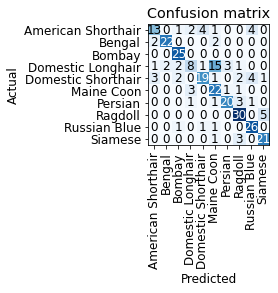

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

Show top losses.

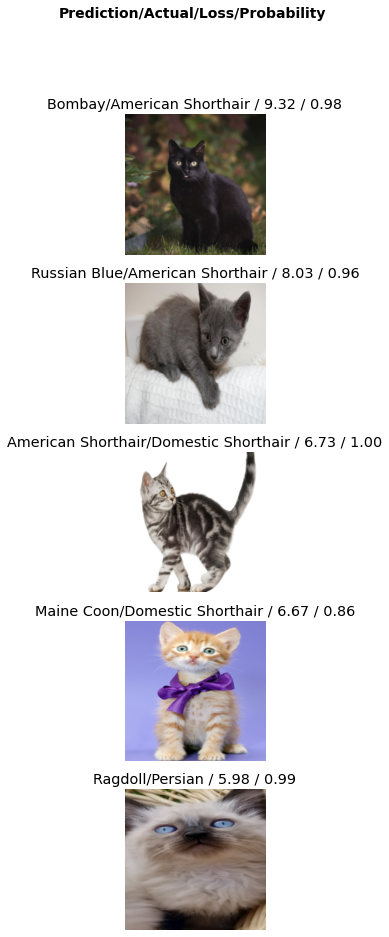

In [17]:
interp.plot_top_losses(5, nrows=5)

Export the model.

In [18]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]